## Project extensions

Here are some project extension ideas:

1. Create a horizontal bar chart to compare the diving depths of animals within a specific group, such as penguins. 

2. Explore deep-sea divers of the midnight zone (depths exceeding 1,000 meters). Incorporate color encoding to indicate which of these species use echolocation.

Add meaningful reference bars into your new story. Ideas include the Titanic's resting depth, deepest human free diver, deepest SCUBA diver, deepest underwater rescue, and the height of the world's tallest building.


In [13]:
import pandas as pd 
df = pd.read_csv('deepest-diving-animals.csv')
df

,animal,category,depth
0,Emperor Penguin,penguins,564
1,King Penguin,penguins,343
2,Rockhopper Penguin,penguins,104
3,Macaroni Penguin,penguins,154
4,Royal Penguin,penguins,226
...,...,...,...
113,Northern Sea Otter,sea otters,97
114,Southern Sea Otter,sea otters,88
115,Atlantic Walrus,walruses,500
116,Dugong,other marine mammals,33


1. Create a horizontal bar chart to compare the diving depths of animals within a specific group, such as penguins. 

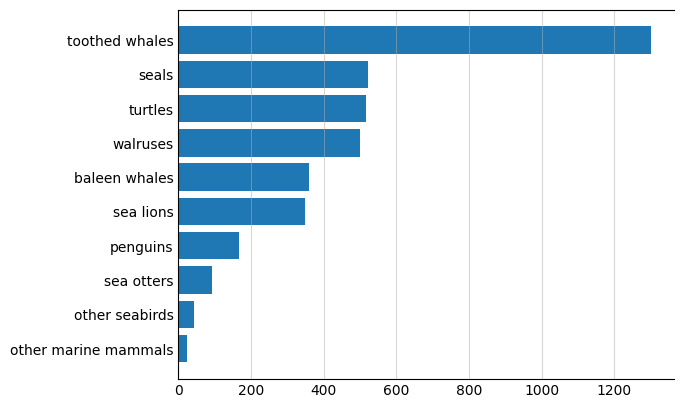

In [14]:
# Group animals per categories
animal_groups = df.groupby('category')['depth'].mean().reset_index().sort_values('depth')

# Create the plot
import matplotlib.pyplot as plt
plt.barh(animal_groups['category'], animal_groups['depth'])

def config_fig():
    """
    Recurring configuration for all the figure of the exercise
    """
    ax = plt.gca()
    ax.spines[['right']].set_visible(False)
    ax.grid(axis='x', alpha=0.5)
    ax.tick_params(axis='both', length=0)
config_fig()

2. Explore deep-sea divers of the midnight zone (depths exceeding 1,000 meters). Incorporate color encoding to indicate which of these species use echolocation.

In [15]:
# Deep diving animals
deep_sea_divers = df.query('depth > 1000')
deep_sea_divers_groups = deep_sea_divers.groupby('category')['depth'].mean().reset_index()

# Color echo_animals into the plot
echo_animals= ['toothed whales', 'baleen whales']
animal_groups['color'] = 'C0'  # Default value
animal_groups.loc[animal_groups['category'].isin(echo_animals), 'color'] = 'C1'
animal_groups

,category,depth,color
1,other marine mammals,24.500000,C0
2,other seabirds,42.888889,C0
5,sea otters,92.500000,C0
3,penguins,167.285714,C0
4,sea lions,348.800000,C0
0,baleen whales,359.571429,C1
9,walruses,500.000000,C0
8,turtles,516.750000,C0
6,seals,521.125000,C0
7,toothed whales,1300.785714,C1


Add meaningful reference bars into your new story. Ideas include the Titanic's resting depth, deepest human free diver, deepest SCUBA diver, deepest underwater rescue, and the height of the world's tallest building.

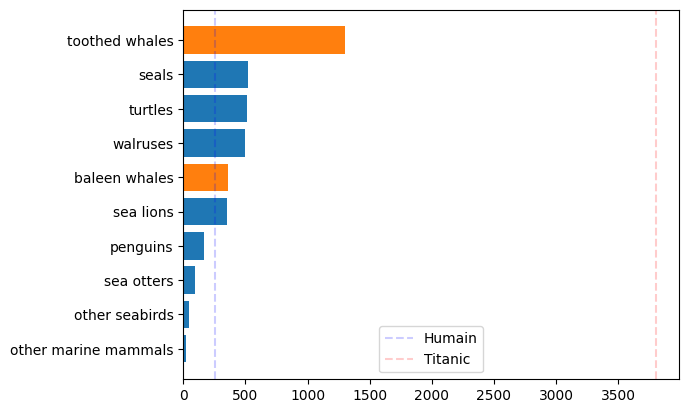

In [48]:
animal_groups.reset_index()
plt.barh(animal_groups['category'], animal_groups['depth'], color=animal_groups['color'])

# Toutes les lignes en une commande
depths = [253, 3800]
labels = ['Humain', 'Titanic']
colors = ['blue', 'red']

for depth, label, color in zip(depths, labels, colors): # Zip assembles all lists
    plt.axvline(depth, linestyle='--', color=color, alpha=0.2, label=label)

plt.legend()